# Abalone

This dataset has been downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Abalone):

_Dua, D. and Graff, C. (2019). UCI Machine Learning Repository <http://archive.ics.uci.edu/ml>. Irvine, CA: University of California, School of Information and Computer Science._

In [1]:
import os
import sys

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from umap import UMAP

import matplotlib.pyplot as plt

from kprototypes import KPrototypes, CategoricalTransformer

In [2]:
# Load dataset
abalone_df = pd.read_csv("../data/abalone.csv")
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# Distinguish between categorical and numerical features
categorical_columns = ["Sex"]
numerical_columns = [
    column for column in abalone_df.columns if column not in categorical_columns
]

In [4]:
# Normalize numerical features
numerical_transformer = StandardScaler()
numerical_values = numerical_transformer.fit_transform(
    abalone_df[numerical_columns].values
)

# Encode categorical features
categorical_transformer = CategoricalTransformer()
categorical_values = categorical_transformer.fit_transform(
    abalone_df[categorical_columns].values
)

In [5]:
# Instanciate model
model = KPrototypes(
    n_clusters=8,
    n_iterations=100,
    verbose=1,
)

# Fit dataset
clustership = model.fit_predict(numerical_values, categorical_values)

#1: cost=6985.645687212001, moves=591
#2: cost=6818.872614321293, moves=234
#3: cost=6657.4257334672675, moves=315
#4: cost=6373.469485354584, moves=308
#5: cost=6202.84301429747, moves=222
#6: cost=6136.183021763415, moves=174
#7: cost=6092.57998854338, moves=124
#8: cost=6066.093867786672, moves=113
#9: cost=6043.080554894438, moves=102
#10: cost=6025.341464351868, moves=92
#11: cost=6009.140740202783, moves=93
#12: cost=5991.448513750453, moves=97
#13: cost=5973.654884155732, moves=82
#14: cost=5960.658521197833, moves=82
#15: cost=5948.554672352551, moves=65
#16: cost=5940.586755768302, moves=54
#17: cost=5935.208592202275, moves=48
#18: cost=5931.339185799886, moves=32
#19: cost=5928.898111031349, moves=31
#20: cost=5926.656734077925, moves=31
#21: cost=5923.913513264557, moves=40
#22: cost=5920.596125589676, moves=30
#23: cost=5919.104352245815, moves=23
#24: cost=5918.311118038354, moves=19
#25: cost=5917.581659075016, moves=20
#26: cost=5916.827811518554, moves=11
#27: cost=591

In [6]:
# Project in 2D plane
umap = UMAP(verbose=True)
projection = umap.fit_transform(np.hstack([numerical_values, categorical_values]))

UMAP( verbose=True)
Sat Mar 30 23:30:20 2024 Construct fuzzy simplicial set
Sat Mar 30 23:30:20 2024 Finding Nearest Neighbors
Sat Mar 30 23:30:20 2024 Building RP forest with 8 trees
Sat Mar 30 23:30:32 2024 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	Stopping threshold met -- exiting after 3 iterations
Sat Mar 30 23:31:07 2024 Finished Nearest Neighbor Search
Sat Mar 30 23:31:15 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Mar 30 23:31:27 2024 Finished embedding


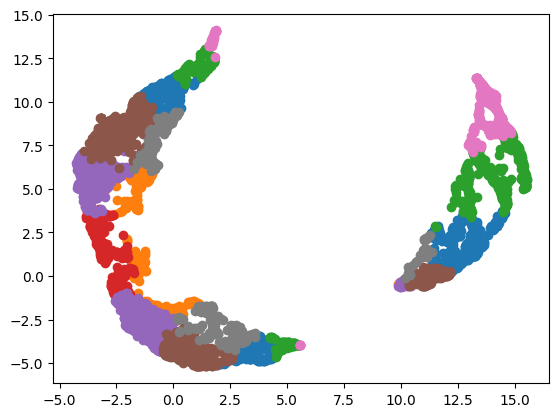

In [7]:
# Show assignment
for k in range(model.n_clusters):
    mask = clustership == k
    plt.scatter(projection[mask, 0], projection[mask, 1])
plt.show()

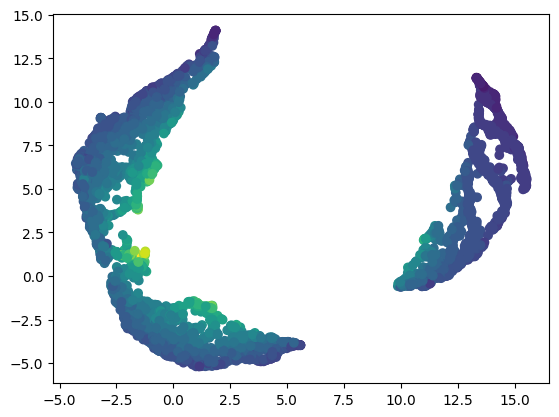

In [8]:
# Show age
plt.scatter(projection[:, 0], projection[:, 1], c=abalone_df["Rings"])
plt.show()